In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from ucimlrepo import fetch_ucirepo 

In [2]:
flags = fetch_ucirepo(id=40) 
  
# data (as pandas dataframes) 
X = flags.data.features 
y = flags.data.targets 
  
# metadata 
print(flags.metadata) 
  
# variable information 
print(flags.variables) 

{'uci_id': 40, 'name': 'Flags', 'repository_url': 'https://archive.ics.uci.edu/dataset/40/flags', 'data_url': 'https://archive.ics.uci.edu/static/public/40/data.csv', 'abstract': 'From Collins Gem Guide to Flags, 1986', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 194, 'num_features': 30, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C52C7Z', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'This data file contains details of various nations and their flags. In this file the fields are separated by spaces (not commas).  With this data you can try things like predicting the religion of a country from its size and the colours in its flag.  \r\n\r\n10 attributes are numeric-valued.  The remainder are e

In [3]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

#Print number of countries by landmass, or continent
#print(df['landmass'].value_counts())

In [4]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[(df['landmass'] == 3) | (df['landmass'] == 6)]


#Print the average vales of the predictors for Europe and Oceania

#print(df_36.groupby('landmass')[var].mean())


In [5]:

#Print the average vales of the predictors for Europe and Oceania

#print(df_36.groupby('landmass')[var].mean())

#Create labels for only Europe and Oceania
labels = (df['landmass'].isin([3, 6]))*1

In [6]:
#Print the variable types for the predictors
print(labels)

#Create dummy variables for categorical predictors
data = pd.get_dummies(df[var])

0      0
1      1
2      0
3      1
4      1
      ..
189    1
190    1
191    0
192    0
193    0
Name: landmass, Length: 194, dtype: int32


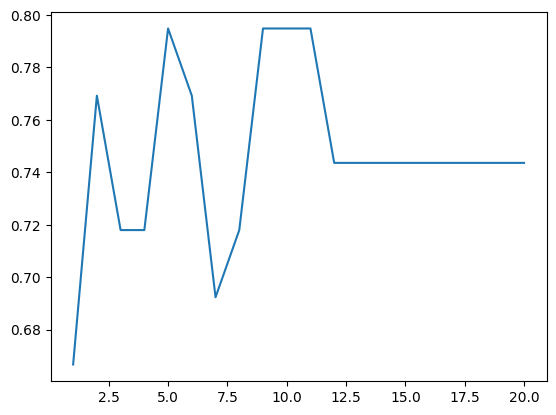

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(X_train, y_train)
    acc_depth.append(dt.score(X_test, y_test))

#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.show()

In [8]:

#Refit decision tree model with the highest accuracy and plot the decision tree
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 79.5% at depth 5


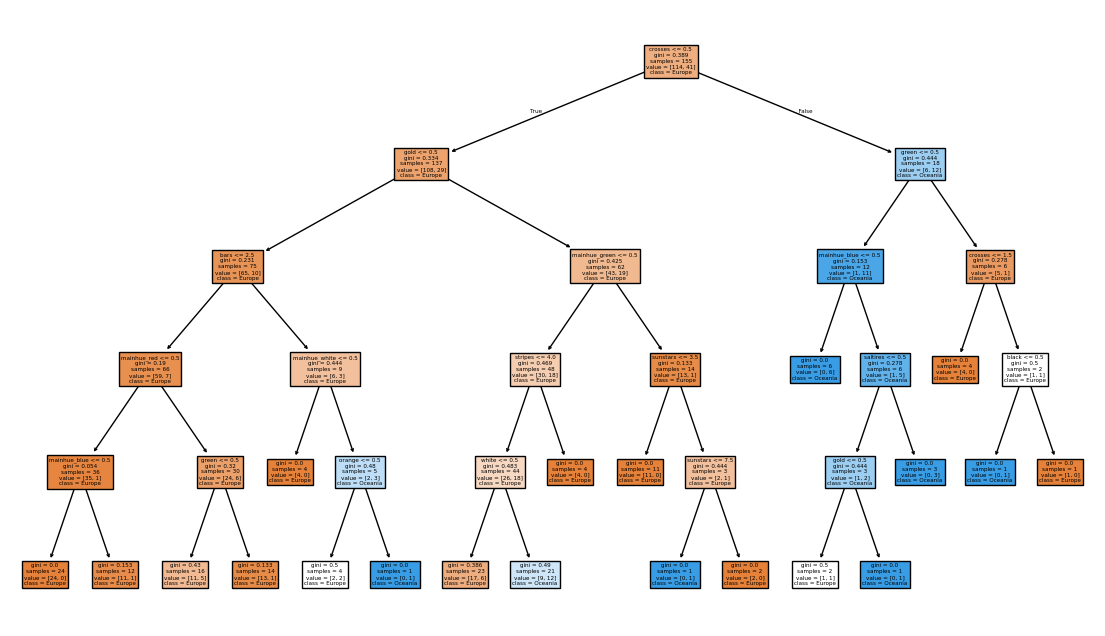

In [9]:
#Refit decision tree model with the highest accuracy and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(X_train, y_train)
tree.plot_tree(dt, feature_names = X_train.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()

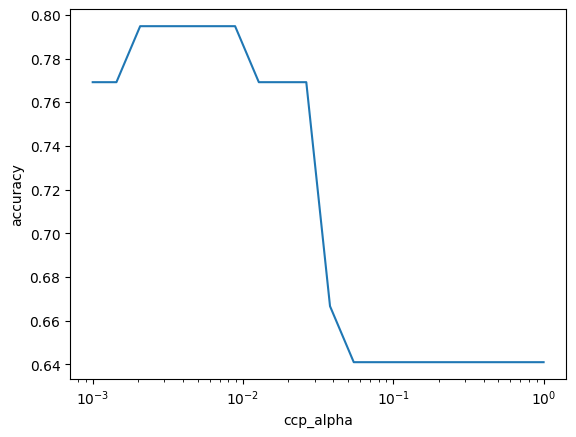

In [10]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(X_train, y_train)
    acc_pruned.append(dt_prune.score(X_test, y_test))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

In [11]:
#Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

Highest accuracy 79.5% at ccp_alpha 0.0021


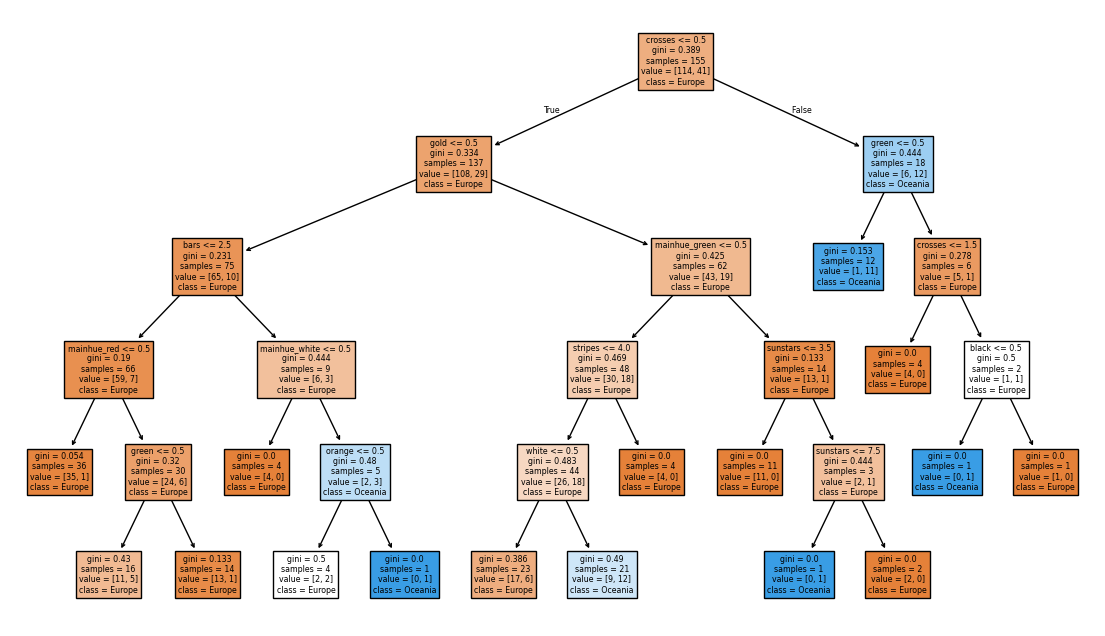

In [12]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp)
dt_final.fit(X_train, y_train)

#Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names = X_train.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()